Non-Linear Regression Part 2
========================

<div class="overview-this-is-a-title overview">
<p class="overview-title">Overview</p>
<p>Questions</p>
    <ul>
        <li> How can I perform statistically robust non-linear regression in a Jupyter notebook?</li>
    </ul>
<p>Objectives:</p>
    <ul>
        <li> Import data from a csv file
        <li> Create a function based on the equation to be fitted
        <li> Generate the best-fit curve with parameters and statistical descriptors
        <li> Create plots of the data
    </ul>
</div>

### Data Fitting
In an earlier module, you used the `linregress` function from the scipy.stats library to perform linear regression. This is sufficient if your looking at linear fit. Python contains tools that also enable you to fit data to an equation that you have defined, including two or more paramaters. So it is ideal for nonlinear curve fitting to the Michaelis-Menten equation.

In this module, we will use some familiar tools: importing csv data into a pandas dataframe and plotting results using the matplotlib.pyplot library. We will also create a function based on the Michaelis-Menten equation. The exciting part is to learn to fit the data to the function using the curve_fit function from scipy.optimize.

Here are the steps in our process:

1. Import the libraries and functions that you need, including curve_fit from scipy.optimize.
1. Set up a pandas dataframe from the MM_data.csv file you saved from the previous module.
1. Create variables to contain the data your independent variable and dependent variables.
1. Create a function for the equation you want to fit. The function should accept as inputs the independent variable(s) and all the parameters to be fit.
1. Use the function curve_fit to fit your data.
1. Extract the fit parameters from the output of curve_fit.
1. Use your function to calculate y values using your fit model to see how well your model fits the data.
1. Graph your original data and the fit equation.

In [1]:
# Import the libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats

Make sure that you are in the correct directory to do this work. The commands are slightly different depending on your operating system.

Mac or Linux:  cd ~/Desktop/python-scripting-biochemistry  
Windows 10: cd c:\Users\username\Desktop\python-scripting-biochemistry

In [2]:
cd ~/Desktop/python-scripting-biochemistry/

/Users/pac8612/Desktop/python-scripting-biochemistry


### Review the Michaelis-Menten equation

The Michaelis-Menten equation describes kinetics for enzyme-catalyzed reactions. We will use the simplest version of the equation, based on initial reaction velocities with a single substrate.

In our equation,  there are two parameters, V$_{max}$ (maximum velocity) and K$_m$ (the Michaelis constant, which equals the substrate concentration at half maximal velocity), an independent variable, \[S\] = substrate concentration, and a dependent variable, V$_i$, the initial velocity.

$$
V_i = \frac{V_{max} * [S]}{K_m + [S]}
$$

We will use the following variables for our equation:

- Vmax = the maximum velocity
- Km = the Michaelis constant
- SubConc = substrate concentration
- Vi = initial velocity

In [3]:
# Set up a pandas dataframe from the MM_data.csv file you saved from the previous module.
# create the filehandle
datafile = os.path.join('biochemist-python', 'chapters', 'data', 'MM_data.csv')

# import the data
rates_df = pd.read_csv(datafile)

# inspect the data to make sure you have substrate concentrations and initial velocities
rates_df.head()

,pNPP (mM),slopes,initial velocities
0,20.0,0.514091,34.272718
1,10.0,0.503140,33.542678
2,7.0,0.470435,31.362310
3,4.0,0.417021,27.801416
4,2.0,0.342445,22.829652


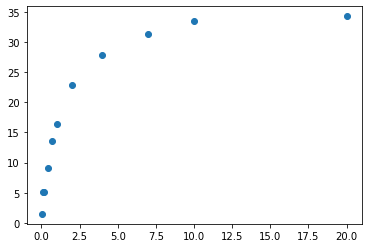

In [4]:
# Create variables to contain the data your independent variable and dependent variables.
ydata = rates_df['initial velocities']
xdata = rates_df['pNPP (mM)']

# Inspect your data to make sure it looks like a Michaelis-Menten plot
plt.plot(xdata, ydata, 'o', label='data')

In [5]:
# Create a function for the equation you want to fit. The function should accept 
# as inputs the independent variable(s) and all the parameters to be fit.
def MM(SubConc, Vmax, Km):
    Vi = (Vmax * SubConc)/(Km + SubConc)
    return Vi

### Common errors 
Python is very particular about the use of parentheses - (), square brackets - [], and braces or curly brackets {}. 

Parentheses are used to pass arguments to functions. For example, 
```python
Vi = MM(xdata, Vmax, Km)
```

Square brackets are used to create lists. In this example, the square brackets are used to call a series from the rates_df dataframe.
```python
xdata = rates_df['pNPP (mM)']
```

Curly brackets or braces are used dictionaries or sets. 
```python
a_dict = {'Brady': 12, 'Evans': 13}
```
You can learn more about [dictionaries in the python online manual](https://docs.python.org/3/library/stdtypes.html#mapping-types-dict). 

In the next cell, we will see the error that results when we use parentheses by mistake rather than square brackets in our attempt to assign a series from a dataframe to a variable. The error message is

```python
TypeError: 'DataFrame' object is not callable
```

The term `callable` here refers to something that happens with a function.

Here are two very useful sources when you encounter errors: [Stack Overflow](https://stackoverflow.com) and [GeeksforGeeks](https://www.geeksforgeeks.org). In fact, if you just paste your error in quotes (e.g., "TypeError: 'DataFrame' object is not callable") into a search engine, you are likely to find hits from both sources.

In [6]:
ydata = rates_df('initial velocities') # Common errors and how to read them

TypeError: 'DataFrame' object is not callable

In [7]:
MM(rates_df['pNPP (mM)'], 100, 1)

0     95.238095
1     90.909091
2     87.500000
3     80.000000
4     66.666667
5     50.000000
6     41.176471
7     28.571429
8     16.666667
9      9.090909
10     4.761905
Name: pNPP (mM), dtype: float64

### Using curve_fit
The syntax for the curve_fit function from scipy.optimize is
```python
popt, pcov = curve_fit(function, xdata, ydata)
```
| Term | Signficance |
| :----: | :---- |
| popt | optimized parameters |
| pcov | a 2D matrix of the covariance for the curve fit |
| curve_fit | the function from scipy.optimize |
| function | the function that we are asking curve_fit to fit the data to |
| x | a data array for the independent variable |
| y | a data array for the dependent variable |

Let's review the function, `MM`, that we defined above, to clearly distinguish the data that are fed into `curve_fit` and `MM`.

```python
def MM(SubConc, Vmax, Km):
    Vi = (Vmax * SubConc)/(Km + SubConc)
    return Vi
```

You need to pass three pieces of data to `MM` to predict the initial velocity for an enzyme-catalyzed reaction: the substrate concentration, and values for $V_{max}$ and $K_m$.

scipy.optimize.curve_fit() can then fit the data to the function you have defined. In an earlier module, there was a discussion of different ways to linearize data so that linear regression could be used, for example, taking logs of the molecular weights of protein standards to plot versus relative migration for an SDS-PAGE gel. You can now fit the data directly using curve_fit.

In [8]:
# Use the function curve_fit to fit your data.
popt, pcov = curve_fit(MM, xdata, ydata)

### Extracting the output from curve_fit
There are two outputs from curve_fit - popt and pcov. These are typical names that help to point to the contents of the variable, but you can choose any variable name you like.
1. popt = the optimized parameters. In our case, the two parameters are $V_{max}$ and $K_m$. Remember that python starts counting at 0, so popt[0] = $V_{max}$ and popt[1] = $K_m$. 
1. pcov = an nD array of the covariance for the parameters, where n is the number of parameters. In our case, n = 2. 

So we can extract the parameters just by setting variables equal to them. The covariance matrix can be used to extract standard errors or standard deviations for each of the parameters. In our case, we will calculate one standard deviation for each parameter. Note that we use two numpy functions (sqrt and diag) to calculate the standard deviation values from the 2D matrix for pcov.

In [10]:
# Extract the fit parameters from the output of curve_fit.
Vmax = popt[0]
Km = popt[1]

# Extract one standard deviation for each parameter
stdev = np.sqrt(np.diag(pcov)) # returns one standard deviation for each parameter
print(f'Vmax for this reaction: {Vmax:.2f} +/- {stdev[0]:.2f}')
print(f'Km for this reaction: {Km:.2f} +/- {stdev[1]:.2f}')

Vmax for this reaction: 36.66 +/- 0.67
Km for this reaction: 1.19 +/- 0.08


### Plotting the data
At this point, you want to compare your plotted data with the curve based on the parameters from curve_fit. We'll do this in two stages. First, we'll use the MM function to calculate y values using your fit model to see how well your model fits the data. 

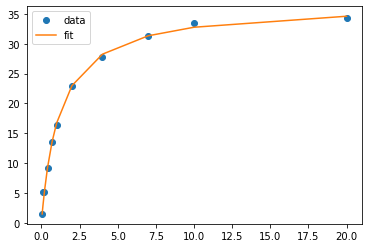

In [12]:
fit_y = MM(xdata, Vmax, Km) # calculates y values based on the curve_fit parameters
# using your fit model to see how well your model fits the data.

# Graph your original data and the fit equation
plt.plot(xdata, ydata, 'o', label='data') # the experimental data
plt.plot(xdata, fit_y, '-', label='fit') # the fit equation
plt.legend()

### Smoothing the plot
You probably noticed that the curve appears a bit disjointed, because it provides values only at the selected concentrations of the substrate. A fit curve based on 1000 x values will be much smoother. To do this, we first use the numpy linspace function to create a new list of 1000 x values ranging from the minimum xdata value (using the numpy min function) to the maximum xdata value (using the numpy max function). Then we generate a fit curve using the MM function. Finally we add the experimental data to the plot.

Text(7.5, 16, 'Km = 1.19 +/- 0.08')

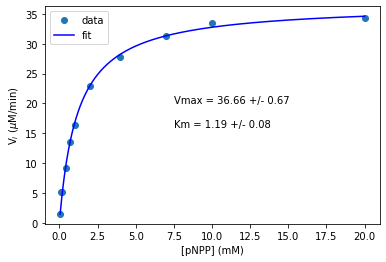

In [19]:
# To generate a smoother fitted curve
smooth_x = np.linspace(np.min(xdata), np.max(xdata), 1000) # new x value range
fit_y = MM(xdata, Vmax, Km) # y values for all 1000 x values
plt.plot(xdata, ydata, 'o', label='data') # plot of the experimental data
plt.plot(smooth_x, MM(smooth_x, Vmax, Km), 'b', label = 'fit') # plot of the fit data
plt.legend() # legend added

# solution to the first exercise

plt.xlabel('[pNPP] (mM)')  # x-axis label
plt.ylabel('V$_i$ ($\mu$M/min)')  # y-axis label in LaTeX _{595} makes 595 the subscripts
plt.annotate(F'Vmax = {Vmax:.2f} +/- {stdev[0]:.2f}', xy = (7.5, 20))
plt.annotate(F'Km = {Km:.2f} +/- {stdev[1]:.2f}', xy = (7.5, 16))

<div class="exercise-this-is-a-title exercise">
<p class="exercise-title">Exercise</p>
    <p> Use what you learned in previous modules to label the x-axis and y-axis and to insert the values for $V_{max}$ and $K_m$ with their standard deviations in the white space on the graph. Change the symbol for the substrate concentrations to a red triangle </p>
    
```{admonition} Solution
:class: dropdown

```python
plt.xlabel('[pNPP] (mM)')  # x-axis label
plt.ylabel('V$_i$ ($\mu$M/min)')  # y-axis label in LaTeX _{595} makes 595 the subscripts
plt.annotate(F'Vmax = {Vmax:.2f} +/- {stdev[0]:.2f}', xy = (7.5, 20))
plt.annotate(F'Km = {Km:.2f} +/- {stdev[1]:.2f}', xy = (7.5, 16))
```
    
</div>

<div class="exercise-this-is-a-title exercise">
<p class="exercise-title">Take Home Exercise</p>
    <p> If you want to dig deeper, you can complete the curve fitting analysis of the chymotrypsin data from the previous module. You may need to adjust some of the details to generate high quality output.</p>
    
<b>I'm not sure if we need this as well. If this is at the end of the workshop, I'm inclined to give them something easy to do.</b>
    
```{admonition} Solution
:class: dropdown

```python
# create the filehandle
datafile = os.path.join('biochemist-python', 'chapters', 'data', 'chymo_MM_data.csv')
# import the data
c_rates_df = pd.read_csv(datafile)
c_rates_df.head()
    
# A look at the data
c_ydata = c_rates_df['Initial Velocities']
c_xdata = c_rates_df['pNPA (mM)']
plt.plot(c_xdata, c_ydata, 'o', label='data')   
    
popt, pcov = curve_fit(MM, c_xdata, c_ydata)
Vmax = popt[0]
Km = popt[1]
perr = np.sqrt(np.diag(pcov)) # returns one standard deviation for each parameter
print(f'Vmax for this reaction: {Vmax:.4f} +/- {perr[0]:.4f}')
print(f'Km for this reaction: {Km:.4f} +/- {perr[1]:.4f}')
    
smooth_x = np.linspace(np.min(c_xdata), np.max(c_xdata), 1000)
fit_y = MM(c_xdata, Vmax, Km)
plt.plot(c_xdata, c_ydata, 'o', label='data')
plt.plot(smooth_x, MM(smooth_x, Vmax, Km), 'b', label = 'fit')
plt.legend()
```
    
</div>

In [21]:
# create the filehandle
datafile = os.path.join('biochemist-python', 'chapters', 'data', 'chymo_MM_data.csv')
# import the data
c_rates_df = pd.read_csv(datafile)
c_rates_df.head()

,pNPA (mM),slopes,Initial Velocities
0,1.0000,0.000557,0.030412
1,0.5000,0.000539,0.029437
2,0.2500,0.000500,0.027293
3,0.1250,0.000450,0.024563
4,0.0625,0.000511,0.027877


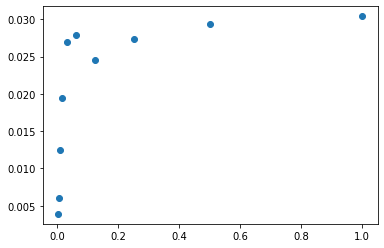

In [22]:
# A look at our data
c_ydata = c_rates_df['Initial Velocities']
c_xdata = c_rates_df['pNPA (mM)']
plt.plot(c_xdata, c_ydata, 'o', label='data')

In [23]:
popt, pcov = curve_fit(MM, c_xdata, c_ydata)
Vmax = popt[0]
Km = popt[1]
perr = np.sqrt(np.diag(pcov)) # returns one standard deviation for each parameter
print(f'Vmax for this reaction: {Vmax:.4f} +/- {perr[0]:.4f}')
print(f'Km for this reaction: {Km:.4f} +/- {perr[1]:.4f}')

Vmax for this reaction: 0.0300 +/- 0.0012
Km for this reaction: 0.0097 +/- 0.0020


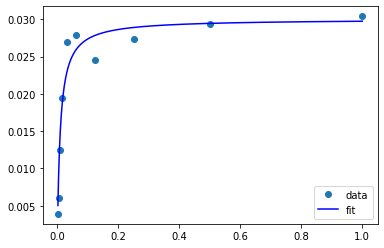

In [24]:
smooth_x = np.linspace(np.min(c_xdata), np.max(c_xdata), 1000)
fit_y = MM(c_xdata, Vmax, Km)
plt.plot(c_xdata, c_ydata, 'o', label='data')
plt.plot(smooth_x, MM(smooth_x, Vmax, Km), 'b', label = 'fit')
plt.legend()